# Planewaves in Homogeneous Media

The eigenmode source can also be used to launch [planewaves](https://en.wikipedia.org/wiki/Plane_wave) in homogeneous media. The dispersion relation for a planewave is ω=|$\vec{k}$|/$n$ where ω is the angular frequency of the planewave and $\vec{k}$ its wavevector; $n$ is the refractive index of the homogeneous medium. This example demonstrates launching planewaves in a uniform medium with $n$ of 1.5 at three rotation angles: 0°, 20°, and 40°. Bloch-periodic boundaries via the `k_point` are used and specified by the wavevector $\vec{k}$. PML boundaries are used only along the x-direction.

First, we'll load our necesarry modules:

In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

Next, we'll create a function we can call multiple times that runs the simulation for different rotation angles:

In [25]:
def run_sim(rot_angle=0):

    resolution = 50  # pixels/μm

    cell_size = mp.Vector3(14, 10, 0)

    pml_layers = [mp.PML(thickness=2, direction=mp.X)]

    fsrc = 1.0  # frequency of planewave (wavelength = 1/fsrc)

    n = 1.5  # refractive index of homogeneous material
    default_material = mp.Medium(index=n)

    k_point = mp.Vector3(fsrc * n).rotate(mp.Vector3(z=1), rot_angle)

    sources = [
        mp.EigenModeSource(
            src=mp.ContinuousSource(fsrc),
            center=mp.Vector3(),
            size=mp.Vector3(y=10),
            direction=mp.AUTOMATIC if rot_angle == 0 else mp.NO_DIRECTION,
            eig_kpoint=k_point,
            eig_band=1,
            eig_parity=mp.EVEN_Y + mp.ODD_Z if rot_angle == 0 else mp.ODD_Z,
            eig_match_freq=True,
        )
    ]

    sim = mp.Simulation(
        cell_size=cell_size,
        resolution=resolution,
        boundary_layers=pml_layers,
        sources=sources,
        k_point=k_point,
        default_material=default_material,
        symmetries=[mp.Mirror(mp.Y)] if rot_angle == 0 else [],
    )

    sim.run(until=100)

    plt.figure(dpi=100)
    sim.plot2D(fields=mp.Ez)
    plt.show()

Next we'll iterate over three rotation angles and plot their steady-state fields profiles. Residues of the backward-propagating waves due to the discretization are slightly visible.

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.00120187 s
Working in 2D dimensions.
Computational cell is 14 x 10 x 0 with resolution 50
time for set_epsilon = 0.0958109 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(1.5,0,0) = 1 after 63 iters


FloatProgress(value=0.0, description='0% done ')

Meep progress: 54.38/100.0 = 54.4% done in 4.0s, 3.4s to go
on time step 5439 (time=54.39), 0.000735447 s/step
run 0 finished at t = 100.0 (10000 timesteps)


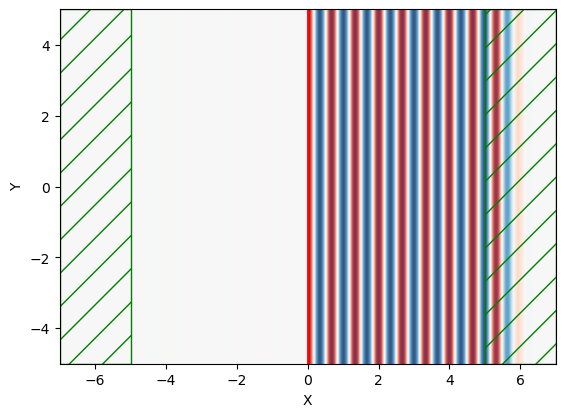

-----------
Initializing structure...
time for choose_chunkdivision = 5.10216e-05 s
Working in 2D dimensions.
Computational cell is 14 x 10 x 0 with resolution 50
time for set_epsilon = 0.176719 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(1.49909,0.0523492,0) = 1 after 70 iters


FloatProgress(value=0.0, description='0% done ')

Meep progress: 19.34/100.0 = 19.3% done in 4.0s, 16.7s to go
on time step 1934 (time=19.34), 0.00206856 s/step
Meep progress: 39.12/100.0 = 39.1% done in 8.0s, 12.5s to go
on time step 3913 (time=39.13), 0.00202222 s/step
Meep progress: 58.82/100.0 = 58.8% done in 12.0s, 8.4s to go
on time step 5883 (time=58.83), 0.00203077 s/step
Meep progress: 78.66/100.0 = 78.7% done in 16.0s, 4.3s to go
on time step 7867 (time=78.67), 0.00201657 s/step
Meep progress: 98.46000000000001/100.0 = 98.5% done in 20.0s, 0.3s to go
on time step 9847 (time=98.47), 0.00202058 s/step
run 0 finished at t = 100.0 (10000 timesteps)


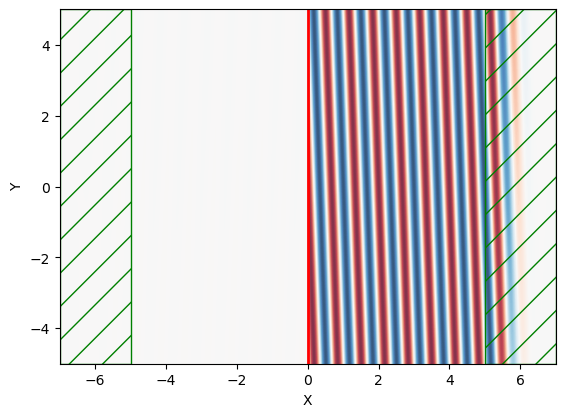

-----------
Initializing structure...
time for choose_chunkdivision = 5.29289e-05 s
Working in 2D dimensions.
Computational cell is 14 x 10 x 0 with resolution 50
time for set_epsilon = 0.177201 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(1.49635,0.104635,0) = 1 after 70 iters


FloatProgress(value=0.0, description='0% done ')

Meep progress: 19.62/100.0 = 19.6% done in 4.0s, 16.4s to go
on time step 1963 (time=19.63), 0.00203868 s/step
Meep progress: 39.38/100.0 = 39.4% done in 8.0s, 12.3s to go
on time step 3939 (time=39.39), 0.00202496 s/step
Meep progress: 59.13/100.0 = 59.1% done in 12.0s, 8.3s to go
on time step 5914 (time=59.14), 0.00202551 s/step
Meep progress: 78.9/100.0 = 78.9% done in 16.0s, 4.3s to go
on time step 7891 (time=78.91), 0.00202328 s/step
Meep progress: 98.65/100.0 = 98.7% done in 20.0s, 0.3s to go
on time step 9866 (time=98.66), 0.00202576 s/step
run 0 finished at t = 100.0 (10000 timesteps)


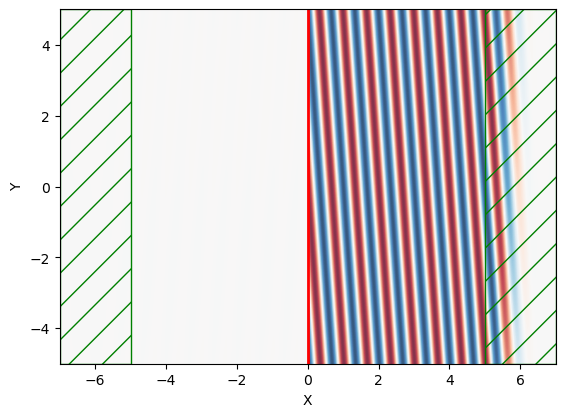

In [26]:
for rot_angle in np.radians([0,2,4]):
    run_sim(rot_angle)

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.00111699 s
Working in 2D dimensions.
Computational cell is 14 x 10 x 0 with resolution 50
time for set_epsilon = 0.095525 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(1.5,0,0) = 1 after 70 iters


FloatProgress(value=0.0, description='0% done ')

Meep progress: 41.44/100.0 = 41.4% done in 4.0s, 5.7s to go
on time step 4145 (time=41.45), 0.000965104 s/step
Meep progress: 85.60000000000001/100.0 = 85.6% done in 8.0s, 1.3s to go
on time step 8561 (time=85.61), 0.000905808 s/step
run 0 finished at t = 100.0 (10000 timesteps)


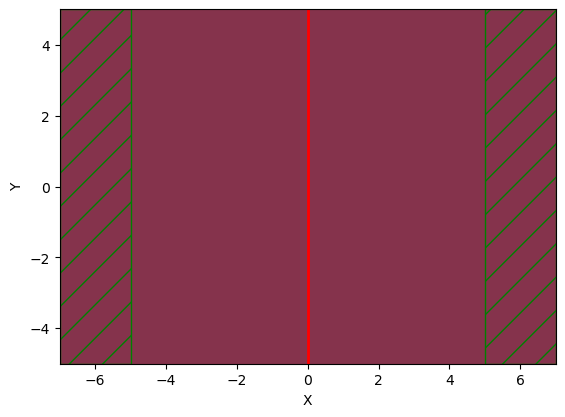

-----------
Initializing structure...
time for choose_chunkdivision = 5.29289e-05 s
Working in 2D dimensions.
Computational cell is 14 x 10 x 0 with resolution 50
time for set_epsilon = 0.181974 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(1.49909,0.0523492,0) = 1 after 70 iters


FloatProgress(value=0.0, description='0% done ')

Meep progress: 14.94/100.0 = 14.9% done in 4.0s, 22.8s to go
on time step 1495 (time=14.95), 0.00267661 s/step
Meep progress: 30.36/100.0 = 30.4% done in 8.0s, 18.4s to go
on time step 3037 (time=30.37), 0.00259467 s/step
Meep progress: 45.76/100.0 = 45.8% done in 12.0s, 14.2s to go
on time step 4577 (time=45.77), 0.00259868 s/step
Meep progress: 61.160000000000004/100.0 = 61.2% done in 16.0s, 10.2s to go
on time step 6117 (time=61.17), 0.00259838 s/step
Meep progress: 76.54/100.0 = 76.5% done in 20.0s, 6.1s to go
on time step 7655 (time=76.55), 0.00260127 s/step
Meep progress: 91.58/100.0 = 91.6% done in 24.0s, 2.2s to go
on time step 9159 (time=91.59), 0.00266037 s/step
run 0 finished at t = 100.0 (10000 timesteps)


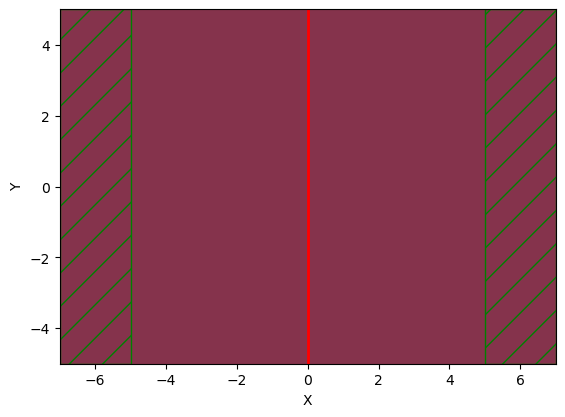

-----------
Initializing structure...
time for choose_chunkdivision = 5.10216e-05 s
Working in 2D dimensions.
Computational cell is 14 x 10 x 0 with resolution 50
time for set_epsilon = 0.178939 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(1.49635,0.104635,0) = 1 after 70 iters


FloatProgress(value=0.0, description='0% done ')

Meep progress: 15.21/100.0 = 15.2% done in 4.0s, 22.3s to go
on time step 1521 (time=15.21), 0.00263061 s/step
Meep progress: 30.75/100.0 = 30.8% done in 8.0s, 18.0s to go
on time step 3075 (time=30.75), 0.00257423 s/step
Meep progress: 46.300000000000004/100.0 = 46.3% done in 12.0s, 13.9s to go
on time step 4630 (time=46.3), 0.00257256 s/step
Meep progress: 61.83/100.0 = 61.8% done in 16.0s, 9.9s to go
on time step 6184 (time=61.84), 0.00257556 s/step
Meep progress: 76.95/100.0 = 77.0% done in 20.0s, 6.0s to go
on time step 7696 (time=76.96), 0.00264614 s/step
Meep progress: 92.18/100.0 = 92.2% done in 24.0s, 2.0s to go
on time step 9219 (time=92.19), 0.00262658 s/step
run 0 finished at t = 100.0 (10000 timesteps)


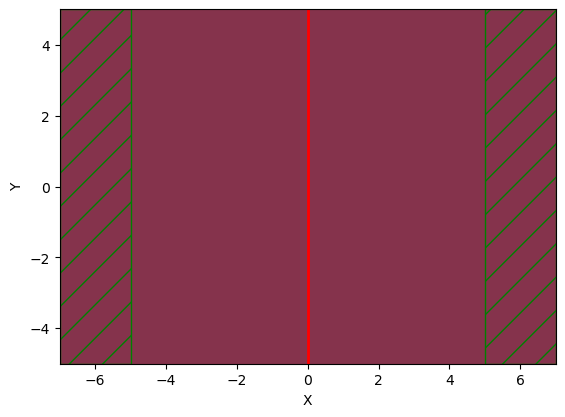

In [8]:
for rot_angle in np.radians([0,2,4]):
    run_sim(rot_angle)

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.00151086 s
Working in 2D dimensions.
Computational cell is 14 x 10 x 0 with resolution 50
time for set_epsilon = 0.0923111 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(1.5,0,0) = 1 after 63 iters


FloatProgress(value=0.0, description='0% done ')

Meep progress: 51.64/100.0 = 51.6% done in 4.0s, 3.7s to go
on time step 5165 (time=51.65), 0.000774467 s/step
run 0 finished at t = 100.0 (10000 timesteps)


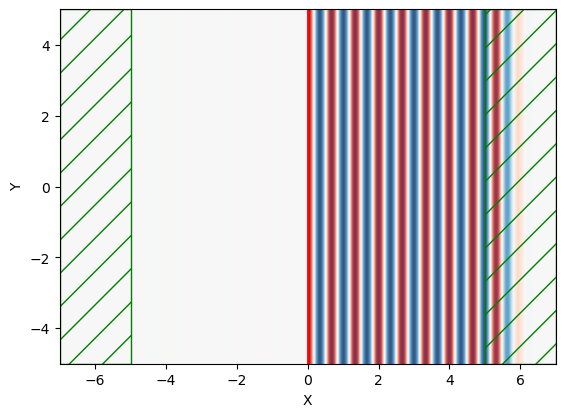

-----------
Initializing structure...
time for choose_chunkdivision = 5.38826e-05 s
Working in 2D dimensions.
Computational cell is 14 x 10 x 0 with resolution 50
time for set_epsilon = 0.180388 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(1.49909,0.0523492,0) = 1 after 70 iters


FloatProgress(value=0.0, description='0% done ')

Meep progress: 18.3/100.0 = 18.3% done in 4.0s, 17.9s to go
on time step 1831 (time=18.31), 0.00218543 s/step
Meep progress: 37.29/100.0 = 37.3% done in 8.0s, 13.5s to go
on time step 3730 (time=37.3), 0.00210716 s/step
Meep progress: 56.230000000000004/100.0 = 56.2% done in 12.0s, 9.3s to go
on time step 5624 (time=56.24), 0.00211266 s/step
Meep progress: 75.43/100.0 = 75.4% done in 16.0s, 5.2s to go
on time step 7544 (time=75.44), 0.00208336 s/step
Meep progress: 94.58/100.0 = 94.6% done in 20.0s, 1.1s to go
on time step 9459 (time=94.59), 0.002089 s/step
run 0 finished at t = 100.0 (10000 timesteps)


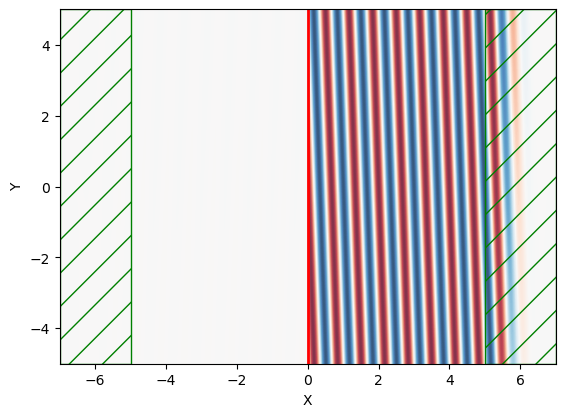

-----------
Initializing structure...
time for choose_chunkdivision = 5.29289e-05 s
Working in 2D dimensions.
Computational cell is 14 x 10 x 0 with resolution 50
time for set_epsilon = 0.182287 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(1.49635,0.104635,0) = 1 after 70 iters


FloatProgress(value=0.0, description='0% done ')

Meep progress: 18.48/100.0 = 18.5% done in 4.0s, 17.7s to go
on time step 1848 (time=18.48), 0.00216498 s/step
Meep progress: 36.72/100.0 = 36.7% done in 8.0s, 13.8s to go
on time step 3672 (time=36.72), 0.00219348 s/step
Meep progress: 55.32/100.0 = 55.3% done in 12.0s, 9.7s to go
on time step 5533 (time=55.33), 0.0021503 s/step
Meep progress: 74.09/100.0 = 74.1% done in 16.0s, 5.6s to go
on time step 7410 (time=74.1), 0.00213155 s/step
Meep progress: 93.35000000000001/100.0 = 93.4% done in 20.0s, 1.4s to go
on time step 9337 (time=93.37), 0.00207669 s/step
run 0 finished at t = 100.0 (10000 timesteps)


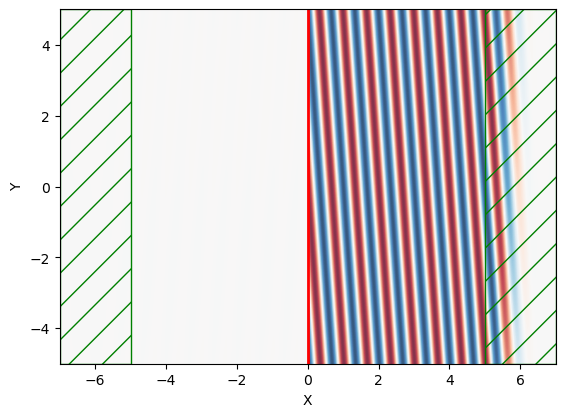

In [4]:
for rot_angle in np.radians([0,2,4]):
    run_sim(rot_angle)

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000969887 s
Working in 2D dimensions.
Computational cell is 14 x 10 x 0 with resolution 50
time for set_epsilon = 0.093199 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(1.5,0,0) = 1 after 63 iters


FloatProgress(value=0.0, description='0% done ')

Meep progress: 52.32/100.0 = 52.3% done in 4.0s, 3.6s to go
on time step 5233 (time=52.33), 0.000764451 s/step
run 0 finished at t = 100.0 (10000 timesteps)


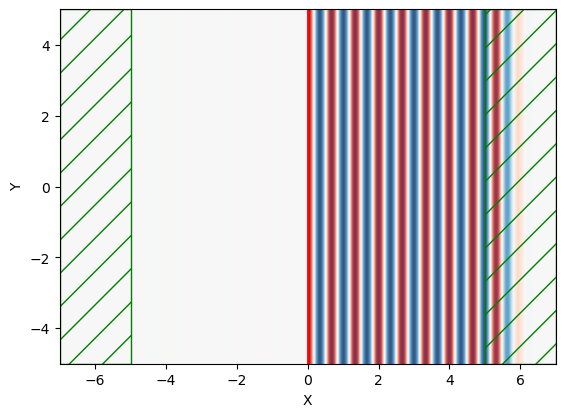

-----------
Initializing structure...
time for choose_chunkdivision = 5.31673e-05 s
Working in 2D dimensions.
Computational cell is 14 x 10 x 0 with resolution 50
time for set_epsilon = 0.177768 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(1.49909,0.0523492,0) = 1 after 70 iters


FloatProgress(value=0.0, description='0% done ')

Meep progress: 15.030000000000001/100.0 = 15.0% done in 4.0s, 22.6s to go
on time step 1504 (time=15.04), 0.00266078 s/step
Meep progress: 30.43/100.0 = 30.4% done in 8.0s, 18.3s to go
on time step 3044 (time=30.44), 0.00259897 s/step
Meep progress: 45.92/100.0 = 45.9% done in 12.0s, 14.1s to go
on time step 4593 (time=45.93), 0.0025827 s/step
Meep progress: 61.57/100.0 = 61.6% done in 16.0s, 10.0s to go
on time step 6158 (time=61.58), 0.00255631 s/step
Meep progress: 77.21000000000001/100.0 = 77.2% done in 20.0s, 5.9s to go
on time step 7722 (time=77.22), 0.00255859 s/step
Meep progress: 92.82000000000001/100.0 = 92.8% done in 24.0s, 1.9s to go
on time step 9283 (time=92.83), 0.00256284 s/step
run 0 finished at t = 100.0 (10000 timesteps)


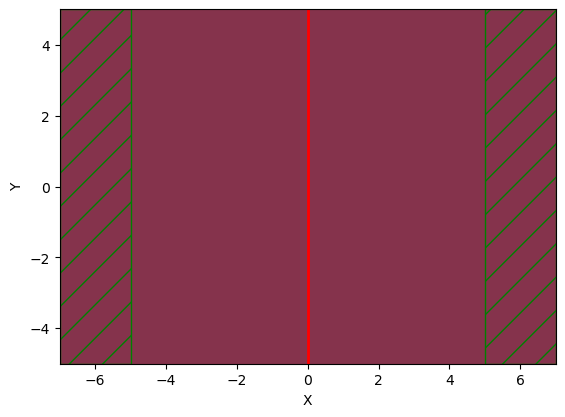

-----------
Initializing structure...
time for choose_chunkdivision = 5.19753e-05 s
Working in 2D dimensions.
Computational cell is 14 x 10 x 0 with resolution 50
time for set_epsilon = 0.178011 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(1.49635,0.104635,0) = 1 after 70 iters


FloatProgress(value=0.0, description='0% done ')

Meep progress: 15.36/100.0 = 15.4% done in 4.0s, 22.0s to go
on time step 1536 (time=15.36), 0.00260431 s/step
Meep progress: 30.580000000000002/100.0 = 30.6% done in 8.0s, 18.2s to go
on time step 3058 (time=30.58), 0.00262927 s/step
Meep progress: 45.57/100.0 = 45.6% done in 12.0s, 14.3s to go
on time step 4557 (time=45.57), 0.00266963 s/step
Meep progress: 60.42/100.0 = 60.4% done in 16.0s, 10.5s to go
on time step 6042 (time=60.42), 0.00269494 s/step
Meep progress: 75.75/100.0 = 75.8% done in 20.0s, 6.4s to go
on time step 7575 (time=75.75), 0.00260967 s/step
Meep progress: 91.27/100.0 = 91.3% done in 24.0s, 2.3s to go
on time step 9127 (time=91.27), 0.0025777 s/step
run 0 finished at t = 100.0 (10000 timesteps)


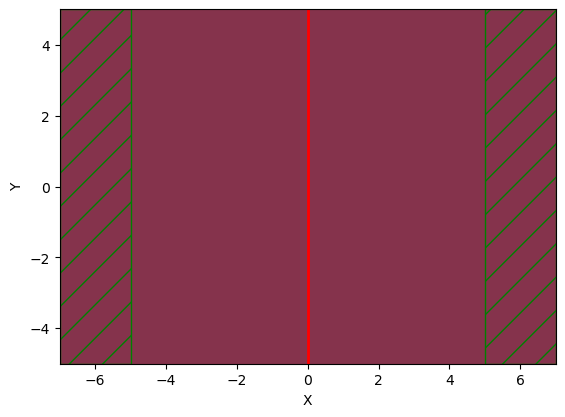

In [6]:
for rot_angle in np.radians([0,2,4]):
    run_sim(rot_angle)

Note that this example involves a `ContinuousSource` for the time profile. For a pulsed source, the oblique planewave is incident at a given angle for only a *single* frequency component of the source. This is a fundamental feature of FDTD simulations and not of Meep per se. Thus, to simulate an incident planewave at multiple angles for a given frequency ω, you will need to do separate simulations involving different values of $\vec{k}$ (`k_point`) since each set of ($\vec{k}$,ω) specifying the Bloch-periodic boundaries and the frequency of the source will produce a different angle of the planewave. For more details, refer to Section 4.5 ("Efficient Frequency-Angle Coverage") in [Chapter 4](https://arxiv.org/abs/1301.5366) ("Electromagnetic Wave Source Conditions") of [Advances in FDTD Computational Electrodynamics: Photonics and Nanotechnology](https://www.amazon.com/Advances-FDTD-Computational-Electrodynamics-Nanotechnology/dp/1608071707).